In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline
import sympy as sp
sp.init_printing()
import math as mt
import pandas as pd
import urllib.request

# Actividad 04: Interpolación

---
### Profesor: Juan Marcos Marín
### Nombre: Isaac Villada Montoya
*Métodos computacionales 2024-II*

---

# 1a
Supongamos que queremos interpolar la función  $f(x)=\sin(x)$  usando los puntos  $x_0=0$ ,  $x_1=\pi/2$ , y  $x_2=\pi$.

Encuentre el polinomio de interpolación de Lagrange y el error asociado al misma. Recuerde que el error de interpolación de Lagrange puede expresarse explícitamente como:

\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(x)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},
Donde:
- $f^{(n+1)}(\xi)$ es la derivada de orden $n$ de la función $f(x)$ evaluada en algún punto $\xi$ en el intervalo de interpolación.



         2
-0.4053 x + 1.273 x


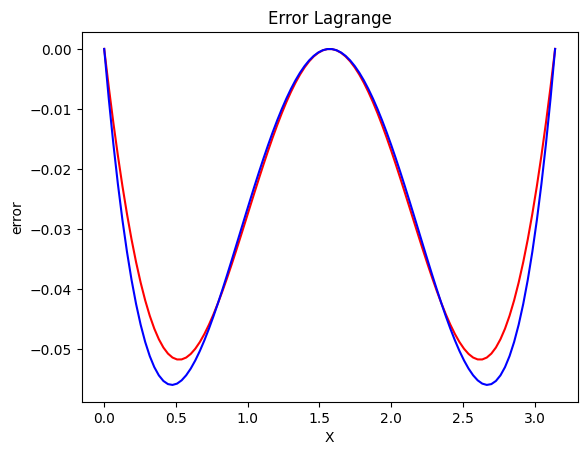

In [ ]:
from scipy.interpolate import lagrange, CubicHermiteSpline, BarycentricInterpolator, CubicSpline
import numpy as np
import math
import sympy as sp
import matplotlib.pyplot as plt

f = lambda x: sp.sin(x)

x = np.array([0, np.pi/2, np.pi])
y = np.array([f(0), f(np.pi/2), f(np.pi)])

P = lagrange(x, y)

Pol = np.poly1d(P)

print(Pol)

x = sp.symbols('x')
f = f(x)
df = sp.diff(f, x, 3)
df = sp.lambdify(x, df, "numpy")

e = lambda z : (df(z)/(math.factorial(4))*(z-0)*(z-np.pi/2)*(z-np.pi))
n = lambda z: np.sin(z) - P(z)

z = np.linspace(0, np.pi, 100)
y = e(z)
l = n(z)
plt.plot(z, y, 'r')
plt.plot(z, l, 'b')
plt.title("Error Lagrange")
plt.xlabel("X")
plt.ylabel("error")
plt.show()

# 1b
Repita el numeral anterior, pero para los polinomios de interpolación de Hermite, conociendo que:


$$
f(x) - P(x) = \epsilon = \frac{f^{(2n+2)}(\xi)}{(2n+2)!} \prod_{i=0}^{n} (x - x_i)^2
$$

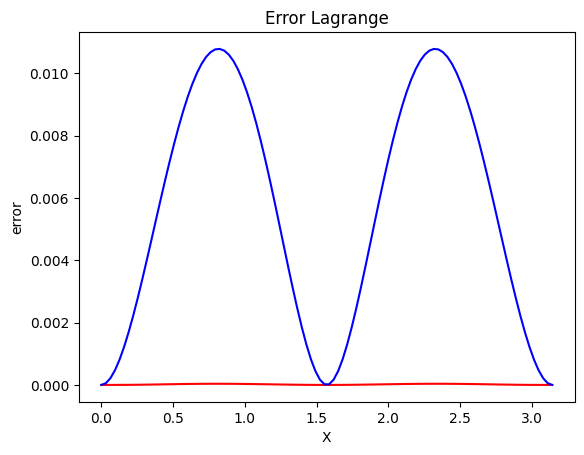

In [ ]:
g = lambda y : sp.sin(y)

x_points = np.array([0, np.pi/2, np.pi])
y_points = np.array([g(0), g(np.pi/2), g(np.pi)])

y = sp.symbols('y')
g = g(y)
dg = sp.diff(g, y)
dg = sp.lambdify(y, dg, "numpy")

derivatives = np.array([dg(0), dg(np.pi/2), dg(np.pi)])

hermite_poly = CubicHermiteSpline(x_points, y_points, derivatives)

dg8 = sp.diff(g, y, 8)
dg8 = sp.lambdify(y, dg8, "numpy")

eh = lambda r: (dg8(r)/math.factorial(8)) * (((r)-0)**2) * (((r)-(np.pi/2))**2) * (((r)-(np.pi))**2)
b = lambda r: np.sin(r) - hermite_poly(r)

u = np.linspace(0, np.pi, 100)
y = eh(u)
l = b(u)
plt.plot(z, y, 'r')
plt.plot(z, l, 'b')
plt.title("Error Lagrange")
plt.xlabel("X")
plt.ylabel("error")
plt.show()

# 2

En física nuclear se calcula la sección eficaz de dispersión (scattering cross section) a partir de experimentos de colisiones, se sabe a partir de la teoría que la sección eficaz se describe por la formula de Breit-Wigner,

$$\sigma(E)=\frac{\sigma_0}{(E-E_r)^2+\frac{\Gamma^2}{4}}$$

donde $E$ es la energía y $E_r,\sigma_0, \Gamma$ son parámetros a ajustar; el valor predicho es $(E_r,\Gamma) = (78, 55)$ MeV; donde $\sigma_0$ se puede calcular ahora a partir de la fórmula simplemente remplazando cualquier par de puntos de la tabla.

A partir de los valores de energía,


```
Energia  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
sigma_exp= np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

```

* Calcule los polinomios de Lagrange, Newton y Hermite.

* Haga un gráfico de los polinomios junto con la función.

* Finalmente, a partir de la diferencia $|f(x) - P_n(x)|$ calcule el error asociado a cada uno de ellos. ¿Cuál será el mejor?

            8             7             6             5             4
-1.155e-13 x + 9.976e-11 x - 3.543e-08 x + 6.631e-06 x - 0.0006943 x
            3         2
 + 0.03955 x - 1.093 x + 11.41 x + 10.6


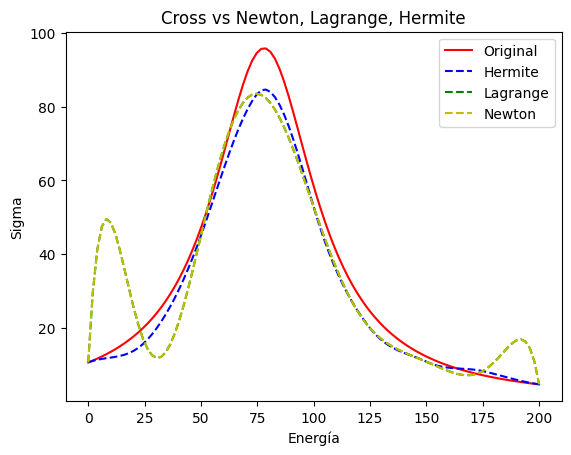

In [ ]:
Energia = np.array([0 , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
sigma_exp = np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])
sigma_0 = 72506.65
E_r = 78
gamma = 55

h = lambda E : sigma_0 / (((E-E_r)**2) + (gamma**2)/4)

E = sp.symbols('E')
h = h(E)
dh = sp.diff(h, E)
dh = sp.lambdify(E, dh, "numpy")

derivatives = np.array([dh(0), dh(25), dh(50), dh(75), dh(100), dh(125), dh(150), dh(175), dh(200)])

hermite_poly = CubicHermiteSpline(Energia, sigma_exp, derivatives)

h = lambda E : sigma_0 / (((E-E_r)**2) + (gamma**2)/4)

lagrange_poly = lagrange(Energia, sigma_exp)

Pol_lagrange_cross =  np.poly1d(lagrange_poly)

print(Pol_lagrange_cross)

newton_poly = BarycentricInterpolator(Energia, sigma_exp)

Energia = np.linspace(0, 200, 100)
y = h(Energia)
Z = hermite_poly(Energia)
V = lagrange_poly(Energia)
W = newton_poly(Energia)
plt.plot(Energia, y, 'r', label = 'Original')
plt.plot(Energia, Z, 'b--', label = 'Hermite')
plt.plot(Energia, V, 'g--', label = 'Lagrange')
plt.plot(Energia, W, 'y--', label = 'Newton')
plt.title("Cross vs Newton, Lagrange, Hermite")
plt.xlabel("Energía")
plt.ylabel("Sigma")
plt.legend()
plt.show()

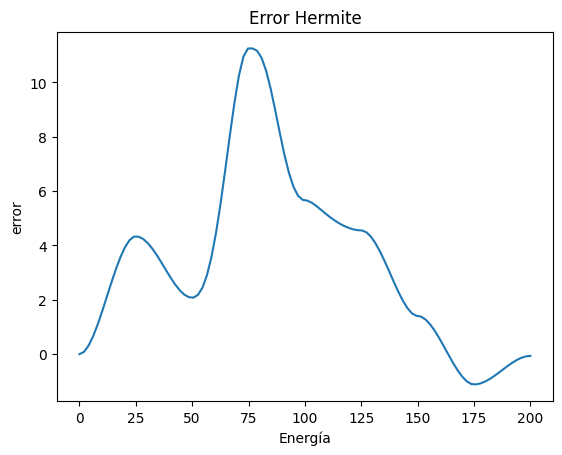

In [ ]:
Q = y - Z
plt.plot(Energia, Q,)
plt.title("Error Hermite")
plt.xlabel("Energía")
plt.ylabel("error")
plt.show()

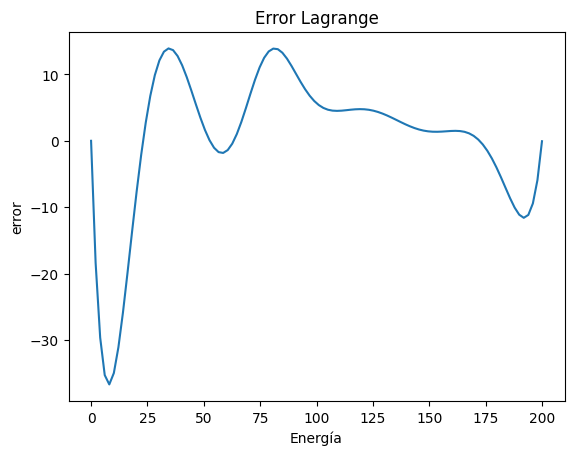

In [ ]:
Q = y - V
plt.plot(Energia, Q,)
plt.title("Error Lagrange")
plt.xlabel("Energía")
plt.ylabel("error")
plt.show()

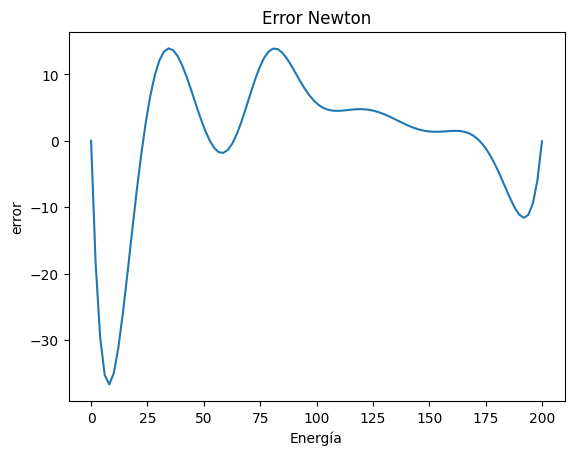

In [ ]:
Q = y - W
plt.plot(Energia, Q,)
plt.title("Error Newton")
plt.xlabel("Energía")
plt.ylabel("error")
plt.show()

#3
Consideremos la función:
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

* Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.
* Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de `sympy` y encuente el error en la interpolación. La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbólica para realizar la estimación de dicha cuota, sólo para $n = 4$, en el punto $x=0.5$.

* Repita la parte inicial para el conjunto de $p_n(x)$ con $n=\{ 4, 8, 12, 16, 20 \}$, usando la interpolación de Hermite, ¿existe alguna diferencia?

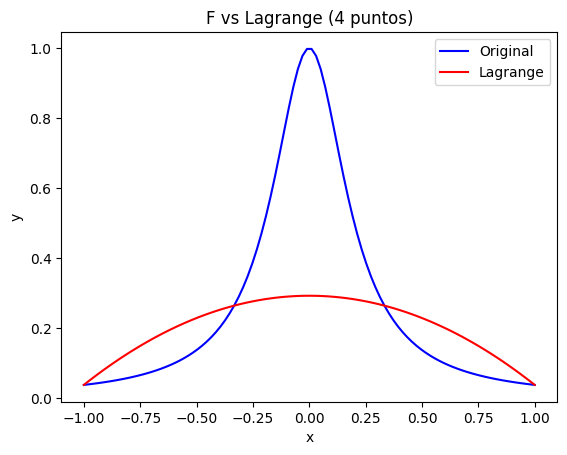

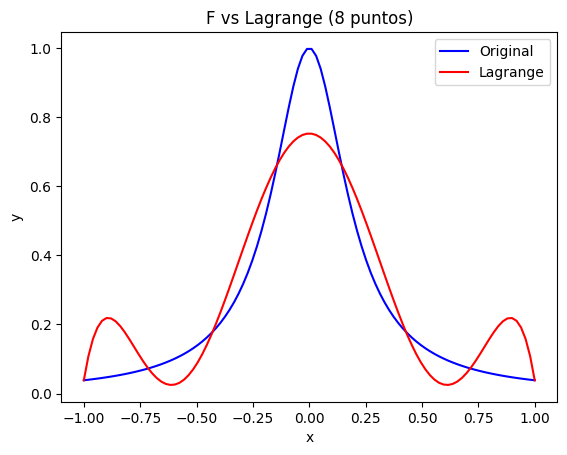

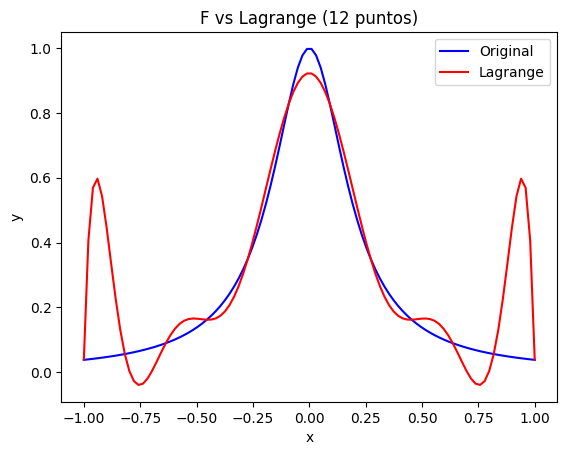

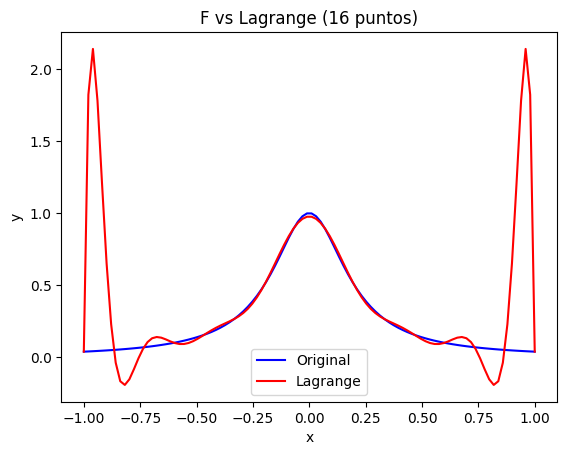

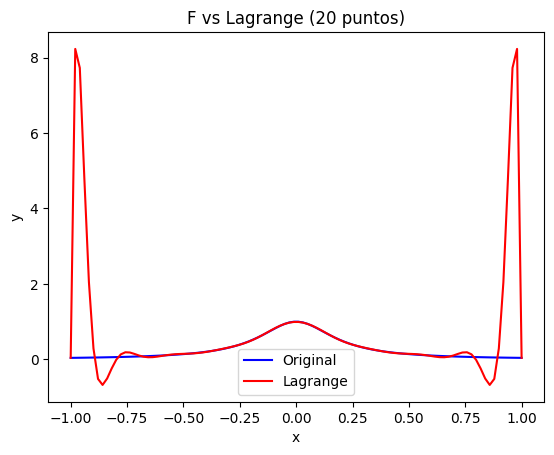

 El error para x = 0.5 para cuatro puntos es: f(0.5) - polinomio_lagrange_4(0.5)


"\nx = sp.symbols('x')\nf(x)\ndf = sp.diff(f, x)\ndf = sp.lambdify(x, df, 'numpy')\n\nderivadas = ([df(i) for i in n])\n\npolinomio_hermite = CubicHermiteSpline(n, y, derivadas)\n\nx = np.linspace(-1, 1, 100)\ny_f = f(x)\ny_hermite = polinomio_hermite(x)\n"

In [ ]:
f = lambda x : 1 / (1 + 25*x**2)

x1 = np.linspace(-1, 1, 4)
y = np.array([f(i) for i in x1])
polinomio_lagrange_4 = lagrange(x1, y)
x = np.linspace(-1, 1, 100)
plt.plot(x, f(x), 'b', label = 'Original')
plt.plot(x, polinomio_lagrange_4(x), 'r', label = 'Lagrange')
plt.title('F vs Lagrange (4 puntos)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

x1 = np.linspace(-1, 1, 8)
y = np.array([f(i) for i in x1])
polinomio_lagrange = lagrange(x1, y)
plt.plot(x, f(x), 'b', label = 'Original')
plt.plot(x, polinomio_lagrange(x), 'r', label = 'Lagrange')
plt.title('F vs Lagrange (8 puntos)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

x1 = np.linspace(-1, 1, 12)
y = np.array([f(i) for i in x1])
polinomio_lagrange = lagrange(x1, y)
plt.plot(x, f(x), 'b', label = 'Original')
plt.plot(x, polinomio_lagrange(x), 'r', label = 'Lagrange')
plt.title('F vs Lagrange (12 puntos)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

x1 = np.linspace(-1, 1, 16)
y = np.array([f(i) for i in x1])
polinomio_lagrange = lagrange(x1, y)
plt.plot(x, f(x), 'b', label = 'Original')
plt.plot(x, polinomio_lagrange(x), 'r', label = 'Lagrange')
plt.title('F vs Lagrange (16 puntos)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

x1 = np.linspace(-1, 1, 20)
y = np.array([f(i) for i in x1])
polinomio_lagrange = lagrange(x1, y)
plt.plot(x, f(x), 'b', label = 'Original')
plt.plot(x, polinomio_lagrange(x), 'r', label = 'Lagrange')
plt.title('F vs Lagrange (20 puntos)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

print(f' El error para x = 0.5 para cuatro puntos es: f(0.5) - polinomio_lagrange_4(0.5)')









'''
x = sp.symbols('x')
f(x)
df = sp.diff(f, x)
df = sp.lambdify(x, df, 'numpy')

derivadas = ([df(i) for i in n])

polinomio_hermite = CubicHermiteSpline(n, y, derivadas)

x = np.linspace(-1, 1, 100)
y_f = f(x)
y_hermite = polinomio_hermite(x)
'''

# 4

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).

Ref: Metodos numericos, Burden.


Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ del pato.

3. Representar el polinomio de interpolación de Lagrange y de Hermite en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?



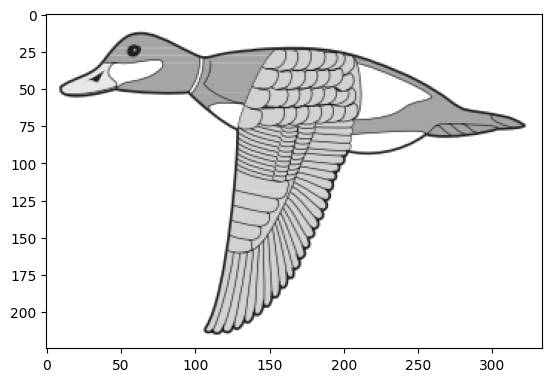

In [ ]:
import requests
import cv2
from tempfile import NamedTemporaryFile

pato = 'https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png'
response = requests.get(pato)

with NamedTemporaryFile(delete=False, suffix=".png") as temp_file:
    temp_file.write(response.content)
    temp_file_path = temp_file.name

imagen_pato = cv2.imread(temp_file_path)

plt.imshow(imagen_pato)

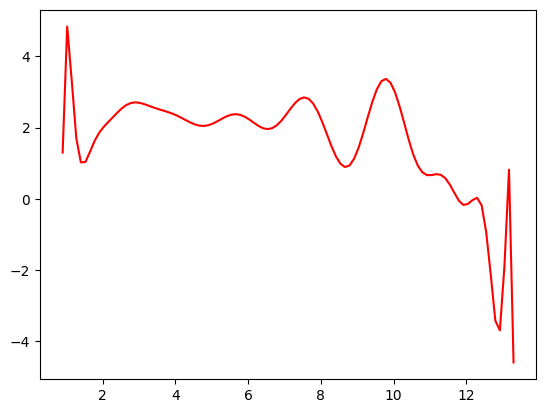

In [ ]:
xp = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3]
yp = [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25]

lagrange_poly_pato = lagrange(xp, yp)

puntos = np.linspace(0.9, 13.3, 100)
ypato = lagrange_poly_pato(puntos)

plt.plot(puntos, ypato, 'r')

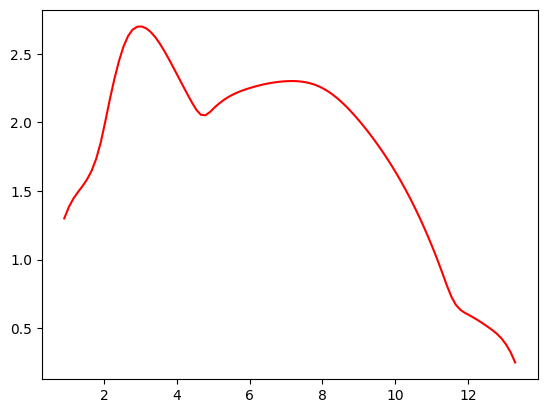

In [ ]:
cubic_spline_poly = CubicSpline(xp, yp)

puntos = np.linspace(0.9, 13.3, 100)
ypato = cubic_spline_poly(puntos)

plt.plot(puntos, ypato, 'r')

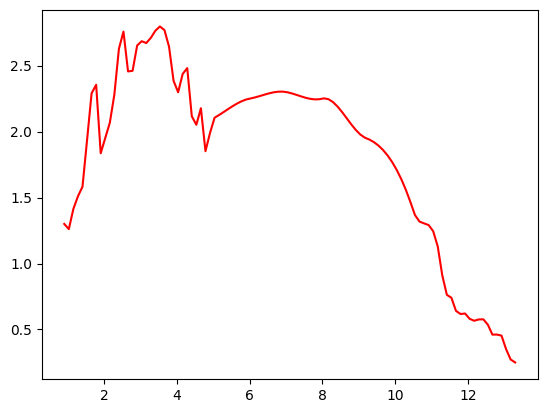

In [ ]:
d = []

for i in range(len(xp)) :

  if i == len(xp)-1 :

    m = yp[i]/xp[i]
    d.append(m)
    break

  m = ((yp[i+1] - yp[i]/(xp[i+1] - xp[i])))
  d.append(m)

h = CubicHermiteSpline(xp, yp, d)

puntos = np.linspace(0.9, 13.3, 100)
ypato = h(puntos)

plt.plot(puntos, ypato, 'r')